# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Hanif Jundanaa
- **Email:** jundanahanif19@gmail.com
- **ID Dicoding:** jun_hanif



## Menentukan Pertanyaan Bisnis

- Bagaimana performa rental sepeda pada tiap bulannya?
- Bagaimana pengaruh cuaca terhadap performa penggunaan rental sepeda?
- Bagaimana pengaruh musim terhadap performa penggunaan rental sepeda?

## Import Semua Packages/Library yang Digunakan

In [460]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

Kumpulkan data dari [bike sharing dataset](https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view?usp=sharing)


*   hour.csv
*   day.csv



In [461]:
hour_df = pd.read_csv("/content/drive/MyDrive/analisis_data/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [462]:
day_df = pd.read_csv("/content/drive/MyDrive/analisis_data/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- xxx
- xxx

### Assessing Data

**menilai data `hour_df`**

In [463]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [464]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [465]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [466]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**menilai data `day_df`**

In [467]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [468]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [469]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [470]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- tipe data `dteday`  pada `hour_df` dan `day_df` tidak sesuai
- tidak ada data kosong pada `hour_df` dan `day_df`
- tidak ada data duplikasi pada `hour_df` dan `day_df`

### Cleaning Data

**Membersihkan data hour_df**

mengubah tipe kolom `dteday` menjadi datetime

In [471]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Membersihkan data `day_df`**

In [472]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [473]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- kolom yr dan mnth tidak dibutuhkan karena terdapat kolom dteday yang dapat menggantikan

## Exploratory Data Analysis (EDA)

### Explore data `hour_df`

In [474]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [475]:
hour_df.groupby("hr").agg({
    "cnt": ["max", "min", "mean", "std"]
}).sort_values(by=("cnt", "mean"), ascending=False)

cnt                            
    max min        mean         std
hr                                 
17  976  15  461.452055  232.656611
18  977  23  425.510989  224.639304
8   839   5  359.011004  235.189285
16  783  11  311.983562  148.682618
19  743  11  311.523352  161.050359
13  760  11  253.661180  148.107657
12  776   3  253.315934  145.081134
15  750   7  251.233196  144.632541
14  750  12  240.949246  147.271574
20  567  11  226.030220  119.670164
9   426  14  219.309491   93.703458
7   596   1  212.064649  161.441936
11  663  10  208.143054  127.495536
10  539   8  173.668501  102.205413
21  584   6  172.314560   89.788893
22  502   9  131.335165   69.937782
23  256   2   87.831044   50.846889
6   213   1   76.044138   55.084348
0   283   2   53.898072   42.307910
1   168   1   33.375691   33.538727
2   132   1   22.869930   26.578642
5    66   1   19.889819   13.200765
3    79   1   11.727403   13.239190
4    28   1    6.352941    4.143818

In [476]:
hour_df[["cnt", "hr", "temp", "atemp", "hum", "windspeed"]].corr()

,cnt,hr,temp,atemp,hum,windspeed
cnt,1.000000,0.394071,0.404772,0.400929,-0.322911,0.093234
hr,0.394071,1.000000,0.137603,0.133750,-0.276498,0.137252
temp,0.404772,0.137603,1.000000,0.987672,-0.069881,-0.023125
atemp,0.400929,0.133750,0.987672,1.000000,-0.051918,-0.062336
hum,-0.322911,-0.276498,-0.069881,-0.051918,1.000000,-0.290105
windspeed,0.093234,0.137252,-0.023125,-0.062336,-0.290105,1.000000


**Insight:**
- Jam 17 memiliki rata-rata jumlah terbesar rental sepeda, sedangkan jam 4 memiliki rata-rata jumlah terkecil.
- jumlah rental sepeda (`cnt`) memiliki korelasi terhadap `temp`(0.404) dan `atemp`(0.4001)

### Explore data `day_df`

In [477]:
day_df.groupby("mnth").agg({
    "cnt": ["max", "min", "mean", "std"],
}).sort_values(by=("cnt", "mean"), ascending=False)

cnt                                
       max   min         mean          std
mnth                                      
6     8120  3767  5772.366667  1240.400031
9     8714  1842  5766.516667  1810.130649
8     7865  1115  5664.419355  1494.516146
7     8173  3285  5563.677419  1273.751871
5     8294  2633  5349.774194  1298.711561
10    8156    22  5199.225806  1988.392517
4     7460   795  4484.900000  1776.160778
11    6852  1495  4247.183333  1285.712709
3     8362   605  3692.258065  1899.301812
12    6606   441  3403.806452  1549.639353
2     5062  1005  2655.298246  1145.313307
1     4521   431  2176.338710  1161.674370

In [478]:
day_df.groupby("season").agg({
    "cnt": ["max", "min", "mean", "std"],
}).sort_values(by=("cnt", "mean"), ascending=False)

cnt                                
         max   min         mean          std
season                                      
3       8714  1115  5644.303191  1459.800381
2       8362   795  4992.331522  1695.977235
4       8555    22  4728.162921  1699.615261
1       7836   431  2604.132597  1399.942119

In [479]:
day_df.groupby("weathersit").agg({
    "cnt": ["max", "min", "mean", "std"],
}).sort_values(by=("cnt", "mean"), ascending=False)

cnt                               
             max  min         mean          std
weathersit                                     
1           8714  431  4876.786177  1879.483989
2           8362  605  4035.862348  1809.109918
3           4639   22  1803.285714  1240.284449

In [480]:
day_df.groupby("workingday").agg({
    "cnt": ["max", "min", "mean", "std"],
}).sort_values(by=("cnt", "mean"), ascending=False)

cnt                               
             max  min         mean          std
workingday                                     
1           8362   22  4584.820000  1878.415583
0           8714  605  4330.168831  2052.141245

In [481]:
day_df.groupby("weekday").agg({
    "cnt": ["max", "min", "mean", "std"],
}).sort_values(by=("cnt", "mean"), ascending=False)

cnt                                
          max   min         mean          std
weekday                                      
5        8362  1167  4690.288462  1874.624870
4        7804   431  4667.259615  1939.433317
6        8714   627  4550.542857  2196.693009
3        8173   441  4548.538462  2038.095884
2        7767   683  4510.663462  1826.911642
1        7525    22  4338.123810  1793.074013
0        8227   605  4228.828571  1872.496629

In [482]:
day_df[['cnt', 'mnth', 'temp', 'atemp', 'hum', 'windspeed']].corr()

,cnt,mnth,temp,atemp,hum,windspeed
cnt,1.000000,0.279977,0.627494,0.631066,-0.100659,-0.234545
mnth,0.279977,1.000000,0.220205,0.227459,0.222204,-0.207502
temp,0.627494,0.220205,1.000000,0.991702,0.126963,-0.157944
atemp,0.631066,0.227459,0.991702,1.000000,0.139988,-0.183643
hum,-0.100659,0.222204,0.126963,0.139988,1.000000,-0.248489
windspeed,-0.234545,-0.207502,-0.157944,-0.183643,-0.248489,1.000000


**Insight:**
- rata-rata jumlah pengguna sepeda rental paling banyak terjadi pada bulan 6(juni) dan rata-rata jumlah paling sedikit terjadi pada bulan 1(januari)
- rata-rata jumlah pengguna sepeda rental paling banyak terjadi pada musim 3(fall) dan rata-rata jumlah paling sedikit terjadi pada musim 1(spring)
- rata-rata jumlah pengguna sepeda rental paling banyak terjadi saat cuaca 1(Clear, Few clouds, Partly cloudy, Partly cloudy)
- rata-rata jumlah pengguna sepeda rental paling banyak pada hari Jumat

## Visualization & Explanatory Analysis


### Pertanyaan 1: Bagaimana performa rental sepeda pada tiap bulannya?


In [483]:
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [484]:
day_df['mnth'] = day_df['dteday'].dt.month_name()
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,January,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,January,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,January,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,January,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


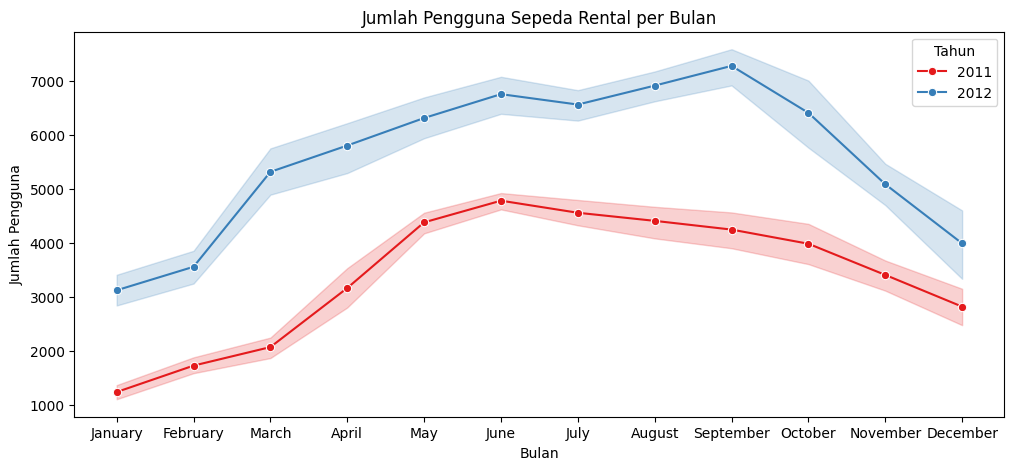

In [485]:
plt.figure(figsize=(12, 5))
sns.lineplot(
    x=day_df["mnth"],
    y=day_df["cnt"],
    hue=day_df["dteday"].dt.year,
    palette="Set1",
    marker="o",
    )

plt.title('Jumlah Pengguna Sepeda Rental per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.legend(title='Tahun')
plt.show()

Berdasarkan line plot diatas, penggunaan rental sepeda pada tahun 2012 lebih unggul dari pada tahun 2011 tiap bulannya. peningkatan tertinggi tahun 2011 terjadi pada bulan juni dan pada tahun 2012 peningkatan tertinggi terjadi pada bulan september.

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap performa penggunaan rental sepeda?


In [486]:
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'cerah',
    2: 'berawan',
    3: 'hujan/salju ringan',
    4: 'hujan/salju besar'
})

<ipython-input-487-ec6839d4c724>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tup

Text(0, 0.5, 'Jumlah Pengguna')

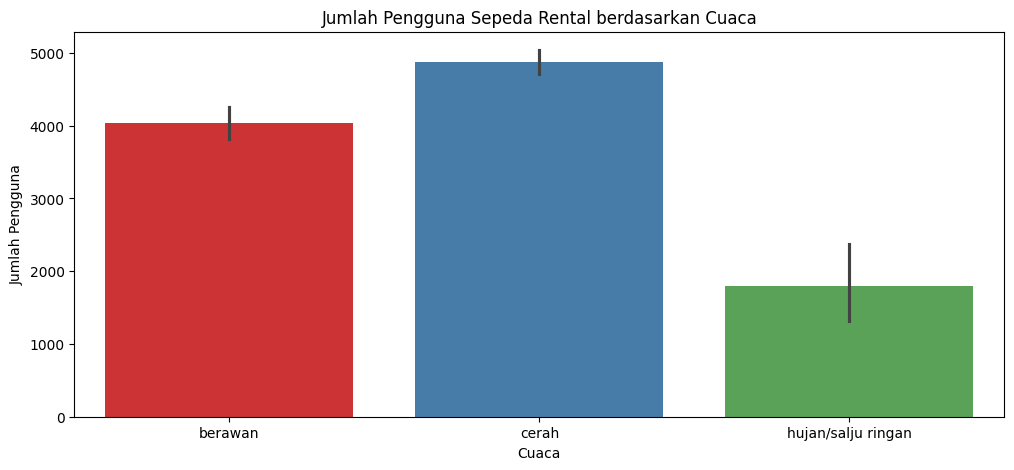

In [487]:
plt.figure(figsize=(12, 5))
sns.barplot(
    x=day_df["weathersit"],
    y=day_df["cnt"],
    palette="Set1",
    )

plt.title('Jumlah Pengguna Sepeda Rental berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Pengguna')

berdasarkan barplot diatas, pengguna rental lebih memilih menggunakan sepeda npada kondisi cerah(1) diikuti cuaca berawan(2) selanjutnya cuaca hujan atau salju ringan.

### Pertanyaan 3: Bagaimana pengaruh musim terhadap performa penggunaan rental sepeda?

In [488]:
day_df['season'] = day_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

<ipython-input-489-ccff8c9f057d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tup

Text(0, 0.5, 'Jumlah Pengguna')

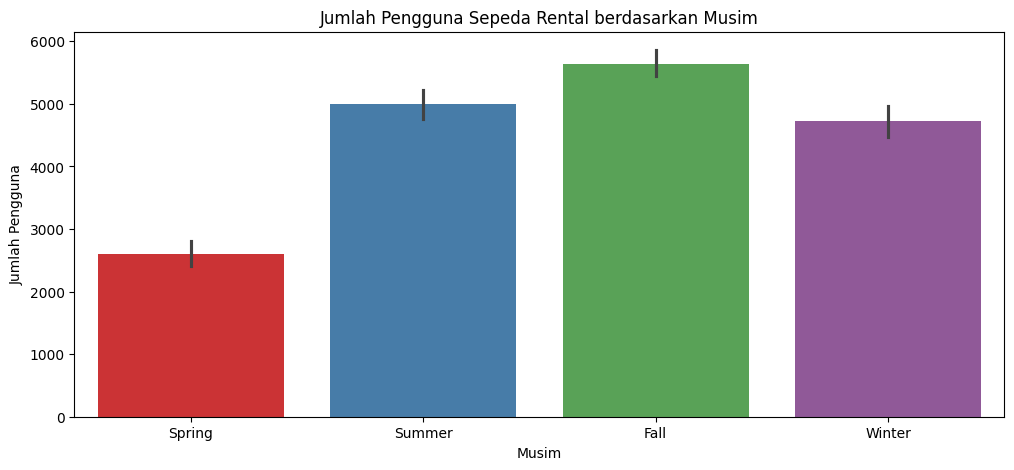

In [489]:
plt.figure(figsize=(12, 5))
sns.barplot(
    x=day_df["season"],
    y=day_df["cnt"],
    palette="Set1",
    )

plt.title('Jumlah Pengguna Sepeda Rental berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna')

Berdasarkan barplot diatas, pengguna rental lebih banyak menggunakan sepeda pada musim Fall.

## Conclusion

- Conclution pertanyaan 1:
  Terdapat perbedaan penggunaan sepeda rental pada tahun 2011 dan 2012. pada tahun 2011 terjadi puncak penggunaan sepeda rental pada bulan Juni dan paling sedikit penggunaan pada bulan Januari. Pada tahun 2012 terjadi puncak penggunaan pada bulan Desember dan paling sedikit pada bulan januari. secara keseluruhan, performa penggunaan rental sepeda pada tahun 2011 tiap bulan meningkat dari pada tahun 2012.
  
- Conclution pertanyaan 2 :
  Terdapat kecenderungan pengguna sepeda rental menggunakan sepeda pada cuaca yang cerah dan berawan. pengguna sepeda pada hujan/salju ringan cenderung lebih sedikit dibandingkan saat cuaca cerah dan berawan. bahkan tidak ada yang menggunakan sepeda pada saat cuaca hujan/salju besar.

- Conclution pertanyaan 3 :
  Penggunaan rental sepeda lebih diminati pada musim Fall diikuti musim Summer. berdasarkan data, ternyata penggunaan rental sepeda bada musim Winter lebih banyak dibandingkan musim Spring.

In [491]:
day_df.to_csv('main_data.csv', index=False)